<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EC%9E%94%EB%94%94%EC%8B%AC%EA%B8%B0/self_study_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr

In [5]:
df = pd.read_csv('/content/Building_Cooling.csv')
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   2160 non-null   int64  
 1   hour                   2160 non-null   int64  
 2   lights [kW]            2160 non-null   float64
 3   mech [kW]              2160 non-null   float64
 4   CHWSupplyTemp [F]      2160 non-null   float64
 5   OAT [C]                2160 non-null   float64
 6   RH [%]                 2160 non-null   int64  
 7   Dewpoint               2160 non-null   float64
 8   wind_speed             2160 non-null   float64
 9   wind_direction         2160 non-null   int64  
 10  Diffsolar [W/m2]       2160 non-null   int64  
 11  Dirsolar [W/m2]        2160 non-null   int64  
 12  CHWCoolingEnergy [kW]  2160 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 219.5 KB


In [6]:
# renaming columns
df.columns = ['date', 'hour', 'lights', 'mechanic', 'CHWTemp', 'OAT', 'RH', 'Dewpoint','windspeed', 'winddirection','difsolar', 'dirsolar', 'target']

In [7]:
# 데이터 시각화 스타일링 지정
sns.set_style('whitegrid')

In [8]:
# date의 int64 정수형을 문자열 형식으로 변환
df['date']= df['date'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2160 non-null   object 
 1   hour           2160 non-null   int64  
 2   lights         2160 non-null   float64
 3   mechanic       2160 non-null   float64
 4   CHWTemp        2160 non-null   float64
 5   OAT            2160 non-null   float64
 6   RH             2160 non-null   int64  
 7   Dewpoint       2160 non-null   float64
 8   windspeed      2160 non-null   float64
 9   winddirection  2160 non-null   int64  
 10  difsolar       2160 non-null   int64  
 11  dirsolar       2160 non-null   int64  
 12  target         2160 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 219.5+ KB


In [10]:
# pandas의 datetime 형식으로 변환
e_df = df.copy()
e_df['date'] = pd.to_datetime(df['date'])
e_df['Hour'] = pd.to_datetime(df['date']).dt.hour # hour를 int64 정수형을 datetime으로 변환
e_df['weekday'] = e_df['date'].dt.weekday
e_df['Date'] = e_df['date'].dt.date
e_df['day'] = e_df['date'].dt.day
e_df['month'] = e_df['date'].dt.month
e_df['weekend'] = e_df['weekday'].isin([5,6]).astype(int)
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2160 non-null   datetime64[ns]
 1   hour           2160 non-null   int64         
 2   lights         2160 non-null   float64       
 3   mechanic       2160 non-null   float64       
 4   CHWTemp        2160 non-null   float64       
 5   OAT            2160 non-null   float64       
 6   RH             2160 non-null   int64         
 7   Dewpoint       2160 non-null   float64       
 8   windspeed      2160 non-null   float64       
 9   winddirection  2160 non-null   int64         
 10  difsolar       2160 non-null   int64         
 11  dirsolar       2160 non-null   int64         
 12  target         2160 non-null   float64       
 13  Hour           2160 non-null   int64         
 14  weekday        2160 non-null   int64         
 15  Date           2160 n

#**1. Target Distribution**

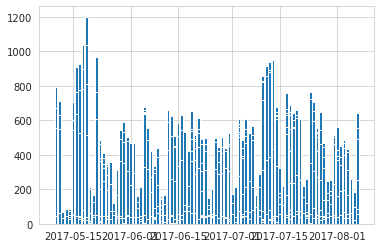

In [11]:
energy = e_df['target']
plt.bar(e_df['date'], e_df['target'])
plt.show()

> 왜도(skewness): 양의값은 데이터가 정규분포보다 왼쪽으로, 음의 값을 가지면 정규분포보다 오른쪽으로 치우쳐져있음  
> -2 ~ 2 정도의 치우침은 왜도가 크지 않다고 판단 

Text(100, 100, 'skew : 1.768')

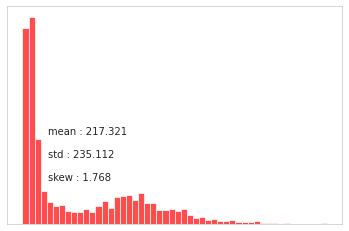

In [12]:
mean = energy.mean().round(3)
std = energy.std().round(3)
skew = (3*(mean - np.median(energy))/energy.std()).round(3)
if skew >= 1.5:
  plt.hist(energy, alpha=0.7, bins=50, color='red')
elif skew <= -1.5:
  plt.hist(energy, alpha=0.7, bins=50, color ='blue')
else:
  plt.hist(energy, alpha=0.7, bins=50, color='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.text(100, 200, f'mean : {mean}',  ha='left', va='center')
plt.text(100, 150, f'std : {std}',  ha='left', va='center')
plt.text(100, 100, f'skew : {skew}',  ha='left', va='center')

> target이 편향성을 가지는 경우 모델 성능에 악영향을 주므로, 편향성을 최대한 줄이기 위해 log transformation을 수행

Text(2, 60, 'skew : 0.025')

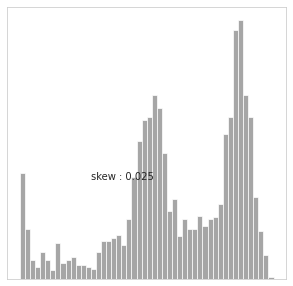

In [13]:
fig = plt.figure(figsize =(5, 5))
energy = np.log(1 + e_df['target'])
mean = energy.mean().round(3)
std = energy.std().round(3)
skew = (3 * (mean-np.median(energy))/energy.std()).round(3)
if skew >= 1.5:
  plt.hist(energy, alpha=0.7, bins=50, color='red')
elif skew <= -1.5:
  plt.hist(energy, alpha=0.7, bins=50, color ='blue')
else:
  plt.hist(energy, alpha=0.7, bins=50, color='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.text(2, 60, f'skew : {skew}', ha='left', va='center')

#**2. energy usage of building in realtion to datetime**

In [14]:
# hour 칼럼 24를 0으로 변경, 판다스는 24값 인식 못함 
e_df['hour'] = e_df['hour'].replace(24, 0)

([], <a list of 0 Text major ticklabel objects>)

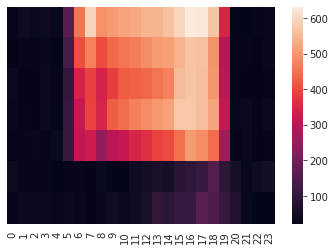

In [15]:
# energy usuage of each building ~ weekday, hour
ee_df = e_df.groupby(['weekday', 'hour'])['target'].mean().reset_index().pivot('weekday','hour','target')
sns.heatmap(ee_df)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

> 평일 낮에만 전력을 사용하는 패턴이 보여짐  
> 평일 야간이나 주말에는 전력소모가 작음

> 변수 간 상관관계는 말 그대로 선형적인 증가, 감소와 관련된 상호 관계만을 나타낼 뿐, 한 변 수가 다른 변수에 영향을 주는 관계를 의미하진 않음 

In [16]:
e_df.head(5)

,date,hour,lights,mechanic,CHWTemp,OAT,RH,Dewpoint,windspeed,winddirection,difsolar,dirsolar,target,Hour,weekday,Date,day,month,weekend
0,2017-05-10,1,1.66,0.35,44.9025,20.6,87,18.3,5.2,190,0,0,77.075388,0,2,2017-05-10,10,5,0
1,2017-05-10,2,3.44,0.35,44.9175,20.6,87,18.3,3.6,180,0,0,36.756450,0,2,2017-05-10,10,5,0
2,2017-05-10,3,1.22,0.35,45.1725,21.1,84,18.3,4.1,200,0,0,0.000000,0,2,2017-05-10,10,5,0
3,2017-05-10,4,1.15,0.35,44.9425,18.9,100,18.9,2.6,230,0,0,2.882613,0,2,2017-05-10,10,5,0
4,2017-05-10,5,0.82,0.35,45.0800,17.8,100,17.8,3.6,210,0,0,0.000000,0,2,2017-05-10,10,5,0


In [19]:
corrs = spearmanr(e_df[['lights','mechanic','CHWTemp','OAT','RH','Dewpoint','windspeed','winddirection','difsolar','dirsolar']], e_df[['target']]).correlation
corr_df = pd.DataFrame(np.array(corrs), columns=['lights','mechanic','CHWTemp','OAT','RH','Dewpoint','windspeed','winddirection','difsolar','dirsolar'])

fig = plt.figure(figsize = (20, 6))
sns.heatmap(corr_df.transpose(), cmap=sns.diverging_palette(240,10,as_cmap=True))
plt.subplots_adjust(hspace = 0.7)

ValueError: ignored